**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Démonstration](static/01-A3-banner.png)

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [3]:
# Manipulation de données
import numpy as np

# Visualisation de données
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(8.7,6.27)})

### 1 - Simulation d'un jeu de données

In [34]:
# nb points
m = 1000

In [35]:
np.random.seed(2020) # Pour la reproductibilité des résultats
theta_0 = 1
theta_1 = 2
x = np.linspace(1,m,m)
y = theta_0 + (theta_1 * x) + np.random.randint(-2,2,m)

Text(0, 0.5, 'y')

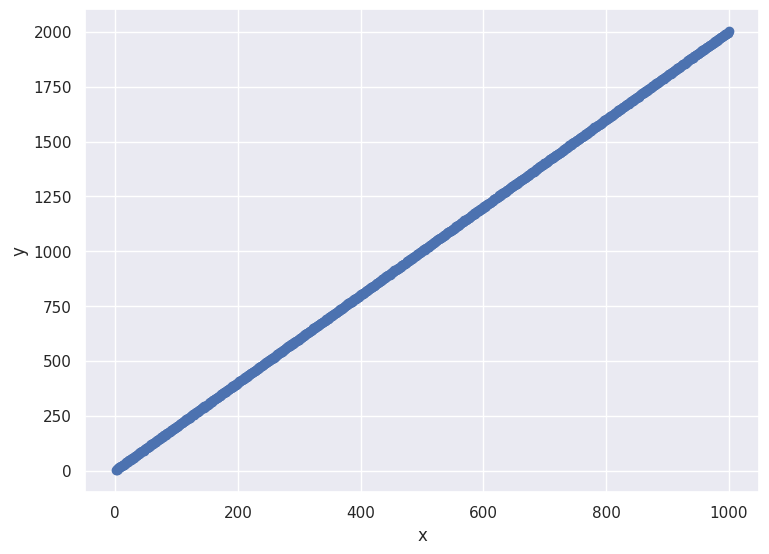

In [36]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [37]:
def hypothesis(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

In [38]:
y_hat = hypothesis(x, theta_0, theta_1)

In [39]:
print(f'x = {x}')
print(f'y_hat = {y_hat}')

x = [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.
  157.  158.  159.  160.  161.  162.  163.  164

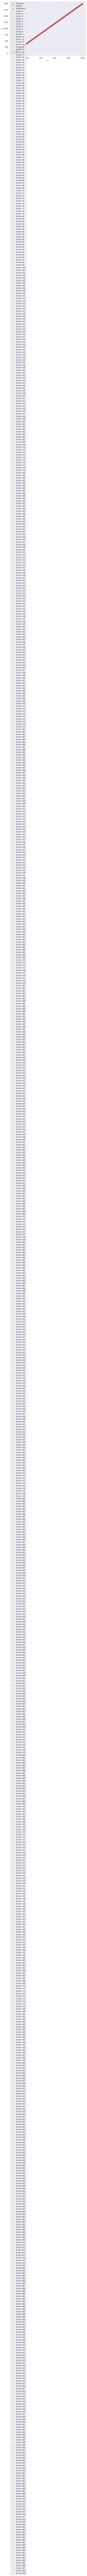

In [40]:
fig, ax = plt.subplots()
ax.scatter(x,y, label="Données")
ax.plot(x, theta_0 + (theta_1 * x), color="g", label='Modèle')
ax.scatter(x, y_hat, color="r", marker="+", s=92, linewidth=2, label="Prédictions")

for i,line in enumerate(x):
    ax.plot([x[i], x[i]] ,[y[i], y_hat[i]], linestyle=":", color = "r", label=f"Erreur {i}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper left')

### 2 - Décomposition du calcul de l'erreur quadratique moyenne

$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

In [41]:
print(f'y = {y}')
print(f'y_hat = {y_hat}')

y = [1.000e+00 3.000e+00 8.000e+00 9.000e+00 1.200e+01 1.400e+01 1.400e+01
 1.800e+01 2.000e+01 1.900e+01 2.200e+01 2.300e+01 2.500e+01 2.700e+01
 3.100e+01 3.200e+01 3.600e+01 3.800e+01 4.000e+01 4.100e+01 4.300e+01
 4.600e+01 4.700e+01 4.800e+01 4.900e+01 5.100e+01 5.300e+01 5.500e+01
 5.900e+01 5.900e+01 6.200e+01 6.400e+01 6.800e+01 6.800e+01 7.100e+01
 7.200e+01 7.500e+01 7.600e+01 7.800e+01 8.100e+01 8.300e+01 8.500e+01
 8.700e+01 9.000e+01 9.000e+01 9.100e+01 9.500e+01 9.700e+01 9.700e+01
 1.010e+02 1.040e+02 1.030e+02 1.080e+02 1.080e+02 1.090e+02 1.120e+02
 1.150e+02 1.180e+02 1.190e+02 1.190e+02 1.220e+02 1.240e+02 1.270e+02
 1.290e+02 1.320e+02 1.320e+02 1.330e+02 1.370e+02 1.370e+02 1.410e+02
 1.440e+02 1.450e+02 1.450e+02 1.490e+02 1.520e+02 1.520e+02 1.550e+02
 1.580e+02 1.600e+02 1.610e+02 1.610e+02 1.630e+02 1.680e+02 1.690e+02
 1.690e+02 1.730e+02 1.750e+02 1.770e+02 1.770e+02 1.810e+02 1.830e+02
 1.840e+02 1.850e+02 1.900e+02 1.900e+02 1.920e+02 1.960e+02 1.960e+02
 1

In [42]:
error = y_hat - y
error

array([ 2.,  2., -1.,  0., -1., -1.,  1., -1., -1.,  2.,  1.,  2.,  2.,
        2.,  0.,  1., -1., -1., -1.,  0.,  0., -1.,  0.,  1.,  2.,  2.,
        2.,  2.,  0.,  2.,  1.,  1., -1.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  0., -1.,  1.,  2.,  0.,  0.,  2.,  0., -1.,  2.,
       -1.,  1.,  2.,  1.,  0., -1.,  0.,  2.,  1.,  1.,  0.,  0., -1.,
        1.,  2.,  0.,  2.,  0., -1.,  0.,  2.,  0., -1.,  1.,  0., -1.,
       -1.,  0.,  2.,  2., -1.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,
        1.,  2., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  2.,  1.,
       -1.,  0., -1.,  1.,  2., -1.,  0.,  1., -1., -1., -1.,  0.,  1.,
       -1.,  2.,  2.,  2.,  2., -1., -1., -1.,  0., -1.,  2.,  1.,  0.,
        2., -1.,  0.,  1.,  0.,  1.,  1.,  1.,  0., -1.,  0.,  0., -1.,
        2., -1.,  2.,  1.,  2.,  0.,  1.,  2.,  0., -1.,  1., -1.,  1.,
        1., -1., -1.,  0.,  0.,  1.,  1.,  0.,  0.,  1., -1.,  1., -1.,
       -1.,  2., -1., -1.,  0., -1.,  0.,  1.,  0.,  0.,  2.,  1

In [43]:
squared_error = (y_hat - y)**2
squared_error

array([4., 4., 1., 0., 1., 1., 1., 1., 1., 4., 1., 4., 4., 4., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 4., 4., 4., 4., 0., 4., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 4., 0., 0., 4., 0., 1.,
       4., 1., 1., 4., 1., 0., 1., 0., 4., 1., 1., 0., 0., 1., 1., 4., 0.,
       4., 0., 1., 0., 4., 0., 1., 1., 0., 1., 1., 0., 4., 4., 1., 0., 4.,
       0., 0., 0., 4., 0., 0., 1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       4., 1., 1., 0., 1., 1., 4., 1., 0., 1., 1., 1., 1., 0., 1., 1., 4.,
       4., 4., 4., 1., 1., 1., 0., 1., 4., 1., 0., 4., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 4., 1., 4., 1., 4., 0., 1., 4., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       4., 1., 1., 0., 1., 0., 1., 0., 0., 4., 1., 0., 1., 4., 1., 4., 1.,
       4., 4., 0., 1., 4., 1., 1., 1., 4., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 4., 4., 1., 4., 0., 4., 0., 1., 1., 1., 4., 0., 4., 1., 0., 1.,
       4., 4., 0., 4., 1.

In [44]:
sse = np.sum((y_hat - y)**2)
sse

1466.0

In [45]:
mse = np.sum((y_hat - y)**2) / m
mse

1.466

In [46]:
print(f'Erreur quadratique moyenne (version vectorisée) = {mse}')

Erreur quadratique moyenne (version vectorisée) = 1.466


In [47]:
%%timeit
np.sqrt(np.sum((y_hat - y)**2) / m)

16 µs ± 526 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### 3 - Calcul de l'erreur quadratique moyenne à l'aide d'une boucle for

In [48]:
%%timeit
sse = 0
for i, _ in enumerate(x):
    y_hat = hypothesis(x[i], theta_0, theta_1)
    diff_squared = (y_hat - y[i])**2
    sse = sse + diff_squared
mse = sse / m

853 µs ± 39.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
print(f'Erreur quadratique moyenne (boucle for) = {mse}')

In [ ]:
np.sqrt(mse)

In [ ]:
# Calculer rapport des mesures de temps d'exécution